In [25]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [19]:
# Embedded CSV data
csv_data = '''CustomerID,Age,Annual_Income,Spending_Score,Region,Segment
1,30,40000,40,North,0
2,25,35000,55,South,1
3,40,75000,60,East,2
4,50,120000,85,West,1
5,23,22000,35,North,0
6,31,68000,70,South,2
7,43,95000,90,East,1
8,55,115000,95,West,2
9,34,45000,50,North,0
10,38,39000,45,South,1
11,30,40000,40,North,0
12,25,35000,55,South,1
13,40,75000,60,East,2
14,50,120000,85,West,1
15,23,22000,35,North,0
16,31,68000,70,South,2
17,43,95000,90,East,1
18,55,115000,95,West,2
19,34,45000,50,North,0
20,38,39000,45,South,1
21,30,40000,40,North,0
22,25,35000,55,South,1
23,40,75000,60,East,2
24,50,120000,85,West,1
25,23,22000,35,North,0
26,31,68000,70,South,2
27,43,95000,90,East,1
28,55,115000,95,West,2
29,34,45000,50,North,0
30,38,39000,45,South,1
31,30,40000,40,North,0
32,25,35000,55,South,1
33,40,75000,60,East,2
34,50,120000,85,West,1
35,23,22000,35,North,0
36,31,68000,70,South,2
37,43,95000,90,East,1
38,55,115000,95,West,2
39,34,45000,50,North,0
40,38,39000,45,South,1
41,30,40000,40,North,0
42,25,35000,55,South,1
43,40,75000,60,East,2
44,50,120000,85,West,1
45,23,22000,35,North,0
46,31,68000,70,South,2
47,43,95000,90,East,1
48,55,115000,95,West,2
49,34,45000,50,North,0
50,38,39000,45,South,1
51,30,40000,40,North,0
52,25,35000,55,South,1
53,40,75000,60,East,2
54,50,120000,85,West,1
55,23,22000,35,North,0
56,31,68000,70,South,2
57,43,95000,90,East,1
58,55,115000,95,West,2
59,34,45000,50,North,0
60,38,39000,45,South,1
61,30,40000,40,North,0
62,25,35000,55,South,1
63,40,75000,60,East,2
64,50,120000,85,West,1
65,23,22000,35,North,0
66,31,68000,70,South,2
67,43,95000,90,East,1
68,55,115000,95,West,2
69,34,45000,50,North,0
70,38,39000,45,South,1
71,30,40000,40,North,0
72,25,35000,55,South,1
73,40,75000,60,East,2
74,50,120000,85,West,1
75,23,22000,35,North,0
76,31,68000,70,South,2
77,43,95000,90,East,1
78,55,115000,95,West,2
79,34,45000,50,North,0
80,38,39000,45,South,1
81,30,40000,40,North,0
82,25,35000,55,South,1
83,40,75000,60,East,2
84,50,120000,85,West,1
85,23,22000,35,North,0
86,31,68000,70,South,2
87,43,95000,90,East,1
88,55,115000,95,West,2
89,34,45000,50,North,0
90,38,39000,45,South,1
91,30,40000,40,North,0
92,25,35000,55,South,1
93,40,75000,60,East,2
94,50,120000,85,West,1
95,23,22000,35,North,0
96,31,68000,70,South,2
97,43,95000,90,East,1
98,55,115000,95,West,2
99,34,45000,50,North,0
100,38,39000,45,South,1'''

In [21]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
# Load data directly from embedded CSV
df = pd.read_csv(StringIO(csv_data))

In [37]:
# Exploratory Data Analysis
def perform_eda(df):
    print("Dataset Information:")
    print(df.info())
    
    print("\nDataset Summary:")
    print(df.describe())
    
    print("\nSegment Distribution:")
    print(df['Segment'].value_counts())

 # Visualization of Customer Segments
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['Annual_Income'], df['Spending_Score'], 
                          c=df['Segment'], cmap='viridis')
    plt.title('Customer Segments: Annual Income vs Spending Score')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.colorbar(scatter)
    plt.show()

In [49]:
# Prepare and Train Model
def train_knn_model(df):
    # Prepare features and target
    features = ['Age', 'Annual_Income', 'Spending_Score']
    X = df[features]
    y = df['Segment']

    # One-hot encode Region
    X = pd.get_dummies(df[features + ['Region']], columns=['Region'])

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

# Predict and evaluate
    y_pred = knn.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

 # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Budget', 'Regular', 'Premium'],
                yticklabels=['Budget', 'Regular', 'Premium'])
    plt.title('Confusion Matrix of Customer Segments')
    plt.show()

    return knn, scaler, X


In [64]:
# Customer Segment Prediction Function
def predict_customer_segment(customer_data, knn, scaler, X):
    # Prepare customer data
    customer_df = pd.DataFrame([customer_data])
    
    # One-hot encode and scale
    features = ['Age', 'Annual_Income', 'Spending_Score']
    customer_features = pd.get_dummies(
        customer_df[features + ['Region']], 
        columns=['Region']
    )

  # Ensure all original columns exist
    for col in X.columns:
        if col not in customer_features.columns:
            customer_features[col] = 0

# Reorder columns to match training data
    customer_features = customer_features[X.columns]
    
    # Scale features
    customer_scaled = scaler.transform(customer_features)
    
    # Predict segment
    segment = knn.predict(customer_scaled)[0]
    segment_names = ["Budget Shoppers", "Regular Shoppers", "Premium Shoppers"]
    return segment_names[segment]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Annual_Income   100 non-null    int64 
 3   Spending_Score  100 non-null    int64 
 4   Region          100 non-null    object
 5   Segment         100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
None

Dataset Summary:
       CustomerID        Age  Annual_Income  Spending_Score     Segment
count  100.000000  100.00000     100.000000      100.000000  100.000000
mean    50.500000   36.90000   65400.000000       62.500000    1.000000
std     29.011492    9.91326   33306.655991       20.504988    0.778499
min      1.000000   23.00000   22000.000000       35.000000    0.000000
25%     25.750000   30.00000   39000.000000       45.000000    0.000000
50%     50.500000  

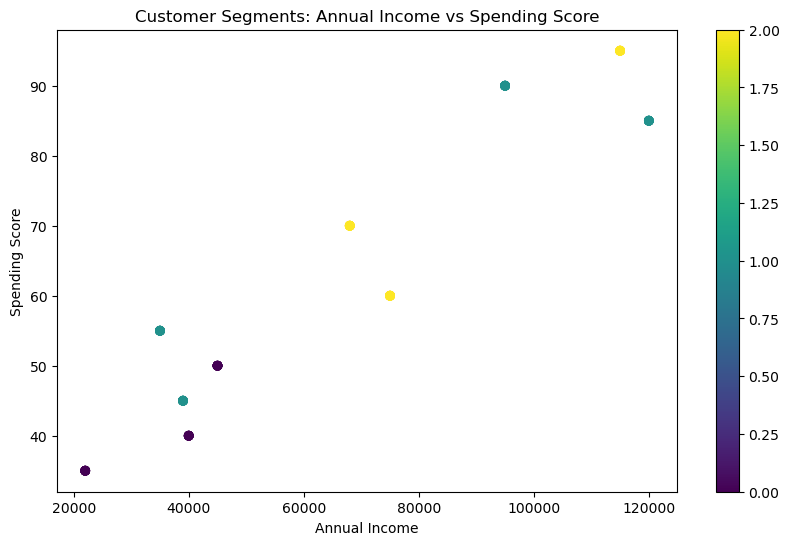

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



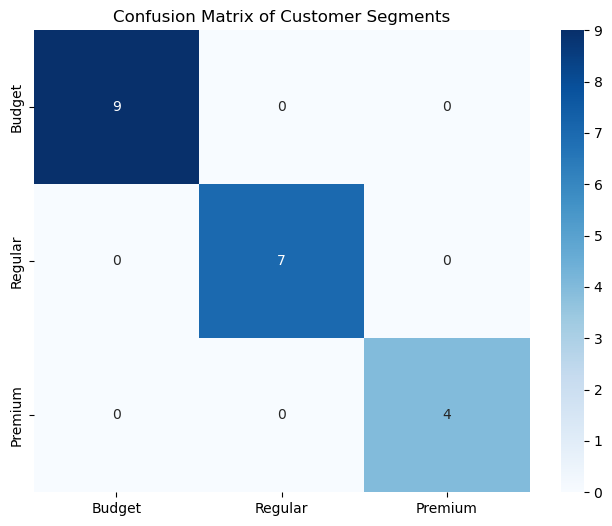


New Customer Segment Prediction:
Budget Shoppers


In [66]:
# Main Execution
def main():
    # Perform Exploratory Data Analysis
    perform_eda(df)
    
    # Train KNN Model
    knn, scaler, X = train_knn_model(df)
    
    # Example Customer Segment Prediction
    new_customer = {
        'Age': 35, 
        'Annual_Income': 75000, 
        'Spending_Score': 60, 
        'Region': 'North'
    }
    
    segment = predict_customer_segment(new_customer, knn, scaler, X)
    print("\nNew Customer Segment Prediction:")
    print(segment)

# Run the main function
if __name__ == "__main__":
    main()